# DATA ANALYSIS

 Data downloaded from Kaggle Dataset: https://www.kaggle.com/mchirico/montcoalert

In [99]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('D:\Sylwia\Data Science Projects\911\911.csv', dtype={'zip':str}, parse_dates=[5])

In [92]:
# Understand your data
def data_info(df):
    print('Number of Instances: {}'.format(df.shape[0]))
    print('Number of Features: {}'.format(df.shape[1]))
    print('\nSummary statistics')
    print(df.describe())
    print('\nHow many values are missing?')
    print(df.isna().sum())
    print('\nWhat is the % of missing values?') # To determine if rows with missing values should be dropped or not
    print(round(df.isna().sum()*100/len(df),2))
    print('\nFeatures types')
    print(df.dtypes)

In [4]:
data_info(df)

Number of Instances: 637239
Number of Features: 9

Summary statistics
                 lat            lng         e
count  637239.000000  637239.000000  637239.0
mean       40.158006     -75.301268       1.0
std         0.212923       1.604792       0.0
min         0.000000    -119.698206       1.0
25%        40.100234     -75.392104       1.0
50%        40.143729     -75.304863       1.0
75%        40.229008     -75.211865       1.0
max        51.335390      87.854975       1.0

How many values are missing?
lat              0
lng              0
desc             0
zip          77399
title            0
timeStamp        0
twp            273
addr             0
e                0
dtype: int64

What is the % of missing values?
lat           0.00
lng           0.00
desc          0.00
zip          12.15
title         0.00
timeStamp     0.00
twp           0.04
addr          0.00
e             0.00
dtype: float64

Features types
lat                 float64
lng                 float64
desc      

In [93]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [101]:
columns = ['Latitude', 'Longitude', 'Emergency Description', 'ZIP Code', 
           'Emergency Title', 'Date and time', 'Township', 'General Address', 'Index column, always 1']

In [102]:
df.columns = columns

In [103]:
df.drop(['ZIP Code'], axis=1, inplace=True)

In [104]:
#Create a new column with a Emergency Category
df['Emergency category'] = df['Emergency Title'].str.split(':', n=1, expand = True)[0]

In [105]:
df['Emergency Title'] = df['Emergency Title'].str.split(':', n=1, expand = True)[1]

In [106]:
# CHANGING OBJECT TYPES
df['Emergency Description'] = df['Emergency Description'].astype(str)
df['Emergency Title'] = df['Emergency Title'].astype('category')
df['Emergency category'] = df['Emergency category'].astype('category')

In [107]:
df['Emergency Title'] = df['Emergency Title'].str.split('-', n=1, expand=True)[0]

In [108]:
df[df.isnull().any(axis=1)]

,Latitude,Longitude,Emergency Description,Emergency Title,Date and time,Township,General Address,"Index column, always 1",Emergency category
1635,40.162804,-75.097848,TURNPIKE OVERPASS; ; 2015-12-14 @ 21:36:52-Sta...,VEHICLE ACCIDENT,2015-12-14 21:36:52,NaN,TURNPIKE OVERPASS,1,Fire
1821,40.099265,-75.175706,CHURCH RD; ; Station 322; 2015-12-15 @ 11:31:36;,UNKNOWN MEDICAL EMERGENCY,2015-12-15 11:31:36,NaN,CHURCH RD,1,EMS
5455,40.222272,-75.138302,GIANT; ; 2015-12-24 @ 17:30:07-Station:STA98;,VEHICLE ACCIDENT,2015-12-24 17:30:07,NaN,GIANT,1,Fire
7281,40.113516,-75.332257,HIGH ST; ; Station 329; 2015-12-30 @ 03:32:49;,VEHICLE ACCIDENT,2015-12-30 03:32:49,NaN,HIGH ST,1,EMS
7282,40.113516,-75.332257,HIGH ST; ; 2015-12-30 @ 03:32:28-Station:STA58;,VEHICLE ACCIDENT,2015-12-30 03:32:28,NaN,HIGH ST,1,Fire
...,...,...,...,...,...,...,...,...,...
623919,40.229008,-75.387853,NO LOCATION - NEIGHBORING COUNTY; ; Station 3...,UNKNOWN MEDICAL EMERGENCY,2020-03-29 21:35:52,NaN,NO LOCATION - NEIGHBORING COUNTY,1,EMS
630844,40.152817,-75.224465,STATION; ; Station 313; 2020-04-24 @ 11:56:55;,CARDIAC EMERGENCY,2020-04-24 11:56:55,NaN,STATION,1,EMS
631459,40.102534,-75.196589,HIGH; ; 2020-04-26 @ 22:52:33-Station:STA69;,FIRE ALARM,2020-04-26 22:52:33,NaN,HIGH,1,Fire
634488,40.080929,-75.116392,RAMP RT422 WB TO TOWNSHIP LINE RD; ; 2020-05-0...,VEHICLE FIRE,2020-05-07 12:26:45,NaN,RAMP RT422 WB TO TOWNSHIP LINE RD,1,Fire


In [109]:
df.dropna(subset=['Township'], inplace=True)

In [110]:
df.isnull().sum()

Latitude                  0
Longitude                 0
Emergency Description     0
Emergency Title           0
Date and time             0
Township                  0
General Address           0
Index column, always 1    0
Emergency category        0
dtype: int64

In [18]:
df['Emergency category'].unique()

[EMS, Fire, Traffic]
Categories (3, object): [EMS, Fire, Traffic]

In [19]:
df.head()

,Latitude,Longitude,Emergency Description,Emergency Title,Date and time,Township,General Address,"Index column, always 1",Emergency category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,GAS,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [115]:
df.groupby(['Emergency category'])['Index column, always 1'].sum().sort_values()

Emergency category
Fire        95608
Traffic    222751
EMS        318607
Name: Index column, always 1, dtype: int64

In [119]:
df['Date and time'].dt.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [67]:
p2 = df[df['Emergency category'] == 'Traffic'].pivot_table(index=df['Date and time'].dt.hour, columns=df['Date and time'].dt.month, values='Index column, always 1', aggfunc=np.sum)

Text(0.5, 1.0, 'Traffic accidents intensity')

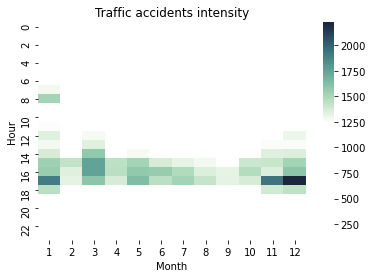

In [72]:
ax2=sns.heatmap(p2,cmap=cmap)
ax2.set_xlabel('Month')
ax2.set_ylabel('Hour')
ax2.set_title('Traffic accidents intensity')

In [22]:
df.to_csv (r'C:\Users\Sylwia\export_dataframe.csv', index = False, header=True)